In [74]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [75]:
data=pd.read_excel('C:/Users/Dell/Downloads/iris.xls')

In [76]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [77]:
from sklearn.preprocessing import LabelEncoder

In [78]:
le_class=LabelEncoder()

In [79]:
data['Classification']=le_class.fit_transform(data['Classification'])

In [80]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [81]:
len(data[data['Classification']==1])

50

In [82]:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

<AxesSubplot:>

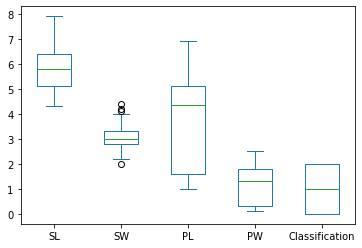

In [83]:
data.plot(kind='box')

<AxesSubplot:>

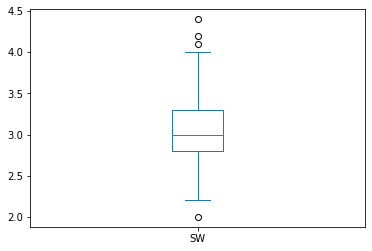

In [84]:
data['SW'].plot(kind='box')

In [85]:
 q1=data['SW'].quantile(0.25)
q2=data['SW'].quantile(0.5)
q3=data['SW'].quantile(0.75)
print(q1)
print(q2)
print(q3)

2.8
3.0
3.3


In [86]:
IQR=q3-q1

In [87]:
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR

In [88]:
upper_limit


4.05

In [89]:
lower_limit

2.05

In [90]:
data.loc[(data['SW']>4.05) | (data['SW']<2.05)]

,SL,SW,PL,PW,Classification
15,5.7,4.4,1.5,0.4,0
32,5.2,4.1,1.5,0.1,0
33,5.5,4.2,1.4,0.2,0
60,5.0,2.0,3.5,1.0,1


In [91]:
data['SW'].mean()

3.0540000000000007

In [102]:
data['SW']=data['SW'].replace([4.4,4.1,4.2,2.0],data['SW'].mean())

<AxesSubplot:>

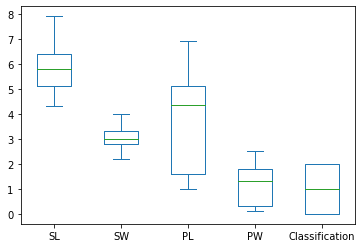

In [104]:
data.plot(kind='box')

In [106]:
data.head(3)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [115]:
X=data.drop(['Classification'],axis=1)
Y=data['Classification']

In [121]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.3,random_state=42)

In [122]:
model=linear_model.LogisticRegression()

In [123]:
model

LogisticRegression()

In [124]:
model.fit(X_train,Y_train)

LogisticRegression()

In [125]:
model.score(X_test,Y_test)

1.0

In [129]:
model.predict([[5,3.5,1.4,.1]])

array([0])

In [130]:
from sklearn.metrics import confusion_matrix

In [132]:
y_pred=model.predict(X_test)

In [136]:
cm=confusion_matrix(Y_test,y_pred)

<AxesSubplot:>

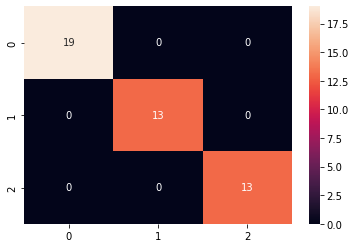

In [138]:
sns.heatmap(cm,annot=True)